In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import sympy as sp

# OBTENDO DADOS

In [90]:
df = pd.read_csv('../DataBase.csv')
display(df.head())
display(df.tail())

,date,price,rate
0,2015-07-07,266.2,0.13
1,2015-07-08,268.6,0.13
2,2015-07-09,269.1,0.13
3,2015-07-10,283.6,0.13
4,2015-07-11,292.0,0.13


,date,price,rate
3448,2024-12-14,101417.7,4.64
3449,2024-12-15,104443.0,4.64
3450,2024-12-16,106057.6,4.64
3451,2024-12-17,106138.9,4.64
3452,2024-12-18,100197.8,4.64


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3453 non-null   object 
 1   price   3453 non-null   float64
 2   rate    3453 non-null   float64
dtypes: float64(2), object(1)
memory usage: 81.1+ KB


# TREINO E TESTE

In [92]:
n = 10
df['yn'] = df.price

for i in range(1, n):
    df[f'yn{i}'] = df.price.shift(i)

df.fillna(0, inplace=True)
df

,date,price,rate,yn,yn1,yn2,yn3,yn4,yn5,yn6,yn7,yn8,yn9
0,2015-07-07,266.2,0.13,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-07-08,268.6,0.13,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-07-09,269.1,0.13,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-07-10,283.6,0.13,283.6,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-07-11,292.0,0.13,292.0,283.6,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,2024-12-14,101417.7,4.64,101417.7,101426.2,100009.9,101126.2,96600.3,97359.4,101115.8,99837.0,99760.7,96970.8
3449,2024-12-15,104443.0,4.64,104443.0,101417.7,101426.2,100009.9,101126.2,96600.3,97359.4,101115.8,99837.0,99760.7
3450,2024-12-16,106057.6,4.64,106057.6,104443.0,101417.7,101426.2,100009.9,101126.2,96600.3,97359.4,101115.8,99837.0
3451,2024-12-17,106138.9,4.64,106138.9,106057.6,104443.0,101417.7,101426.2,100009.9,101126.2,96600.3,97359.4,101115.8


In [93]:
def getSecondsArray(dateArray):
    return dateArray.apply(lambda row: row.timestamp())

def getSeconds(days):
    return days * (24*60*60) 


df['date'] = pd.to_datetime(df['date'])
df['date_sec'] = getSecondsArray(df.date)

timeArray = df.date_sec.values
df.head()

,date,price,rate,yn,yn1,yn2,yn3,yn4,yn5,yn6,yn7,yn8,yn9,date_sec
0,2015-07-07,266.2,0.13,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436227e+09
1,2015-07-08,268.6,0.13,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436314e+09
2,2015-07-09,269.1,0.13,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436400e+09
3,2015-07-10,283.6,0.13,283.6,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,1.436486e+09
4,2015-07-11,292.0,0.13,292.0,283.6,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,1.436573e+09


In [94]:
def getTrainArrays(df):
    xData = df.drop(columns=['date', 'price', 'yn'])
    yData = df.price.values
    return xData, yData

xData, yData = getTrainArrays(df)
xData.head(5)

,rate,yn1,yn2,yn3,yn4,yn5,yn6,yn7,yn8,yn9,date_sec
0,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436227e+09
1,0.13,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436314e+09
2,0.13,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436400e+09
3,0.13,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,1.436486e+09
4,0.13,283.6,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,1.436573e+09


# MODELO PREDITIVO

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

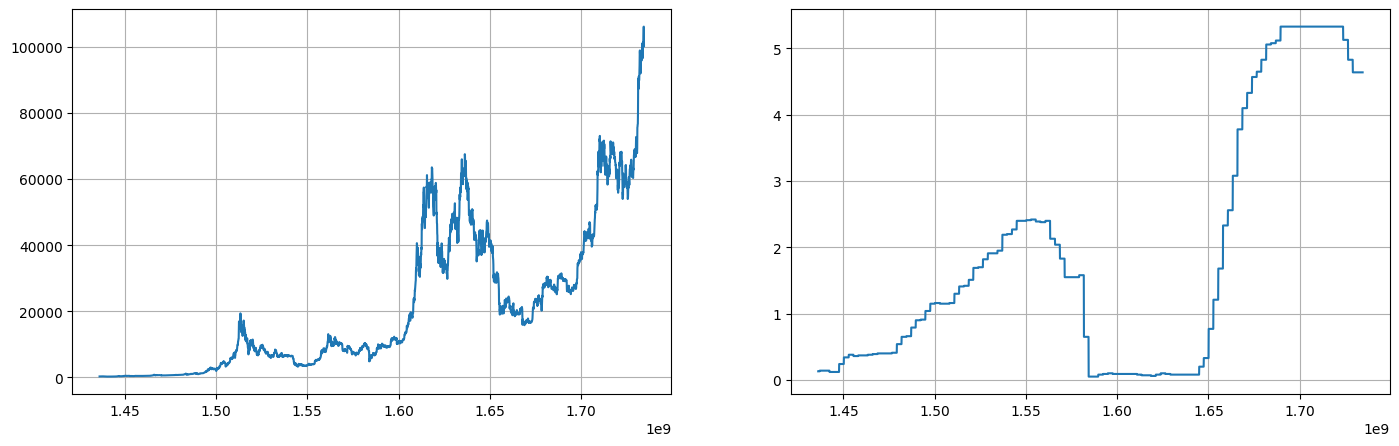

In [96]:
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(df.date_sec, df.price)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df.date_sec, df.rate)
plt.grid()

# REGRESSÃO LINEAR

score: 0.998


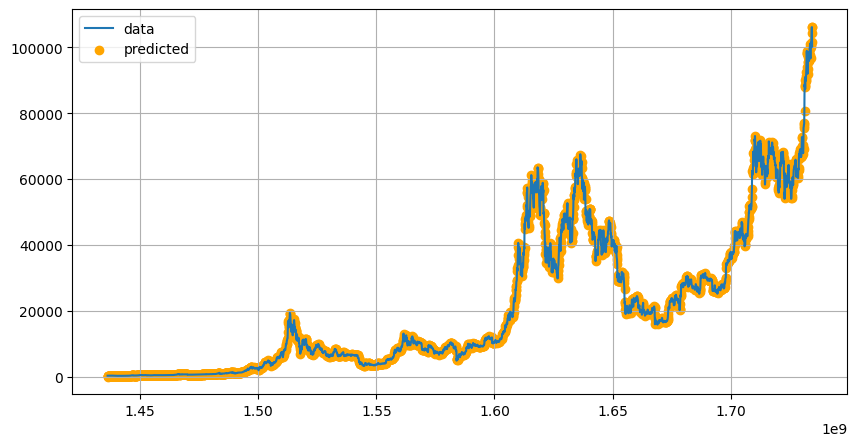

In [97]:
def linearRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = LinearRegression()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = linearRegression(xData, yData)
print(f'score: {score:.3f}')

predicted = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

# REGRESSÃO POLINOMIAL

score: 0.997


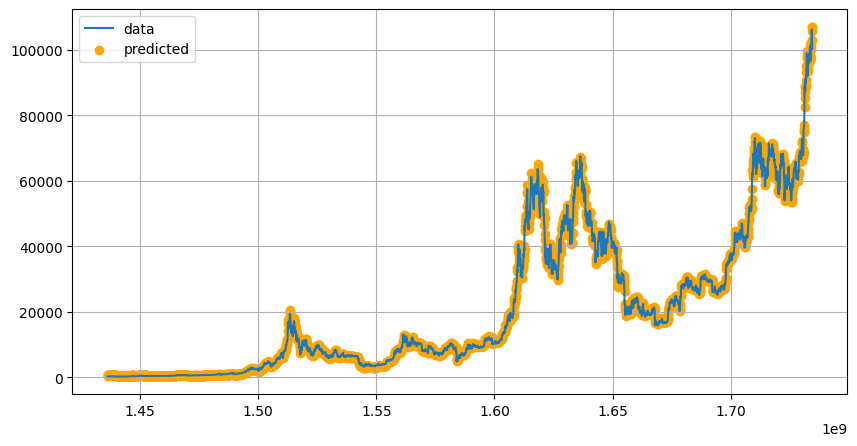

In [98]:
def polinomialRegression(xData, yData, degree=2):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = polinomialRegression(xData, yData, degree=2)
print(f'score: {score:.3f}')

predicted = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

# ÁRVORE DE DECISÃO

score: 0.996


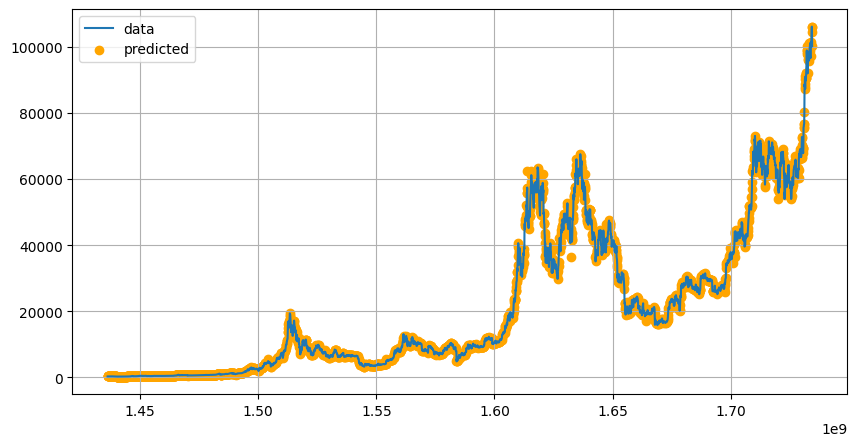

In [99]:
def decisionTreeRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = DecisionTreeRegressor()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = decisionTreeRegression(xData, yData)
print(f'score: {score:.3f}')

predicted = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

# RANDOM FOREST

score: 0.997


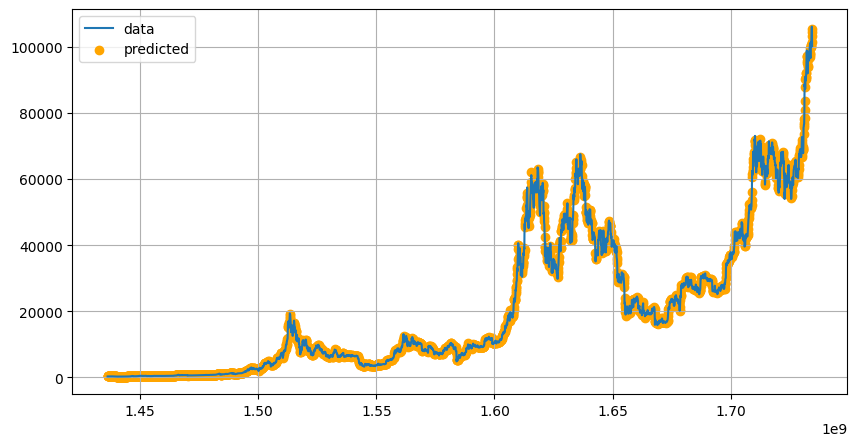

In [100]:
def randomForestRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = RandomForestRegressor()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = randomForestRegression(xData, yData)
print(f'score: {score:.3f}')

predicted = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

# SUPORTE VETORIAL PARA REGRESSÃO (SVR)

score: -0.200


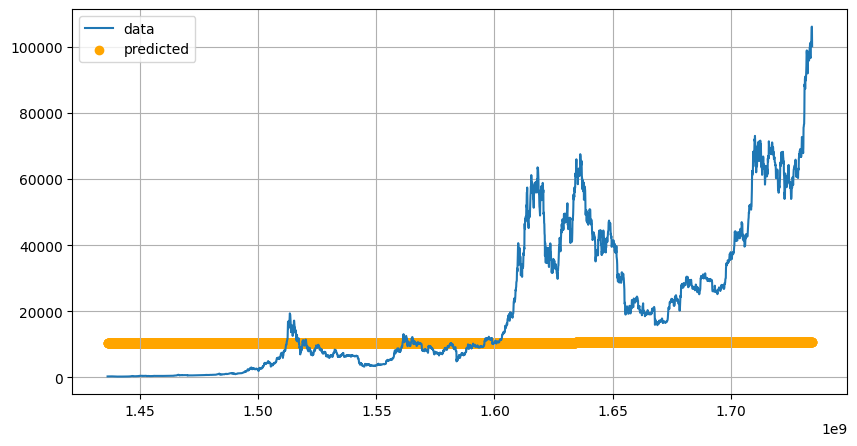

In [101]:
def supportVectorRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = SVR(kernel='poly')  # kernel pode ser 'linear', 'poly', ou 'rbf'
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = supportVectorRegression(xData, yData)
print(f'score: {score:.3f}')

predicted = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

# RIDGE REGRESSOR

score: 0.998


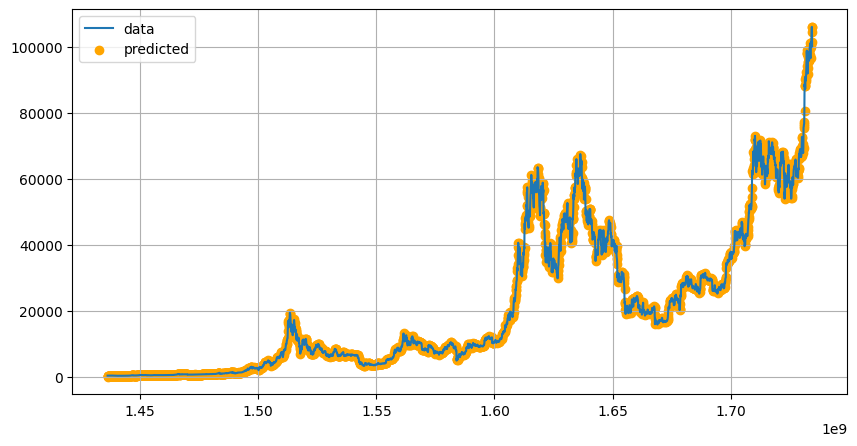

In [102]:
def ridgeRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = Ridge(alpha=1.0)  # Ajuste o parâmetro alpha para regularização
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = ridgeRegression(xData, yData)
print(f'score: {score:.3f}')

predicted = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

# GRADIENT BOOSTER

score: 0.998


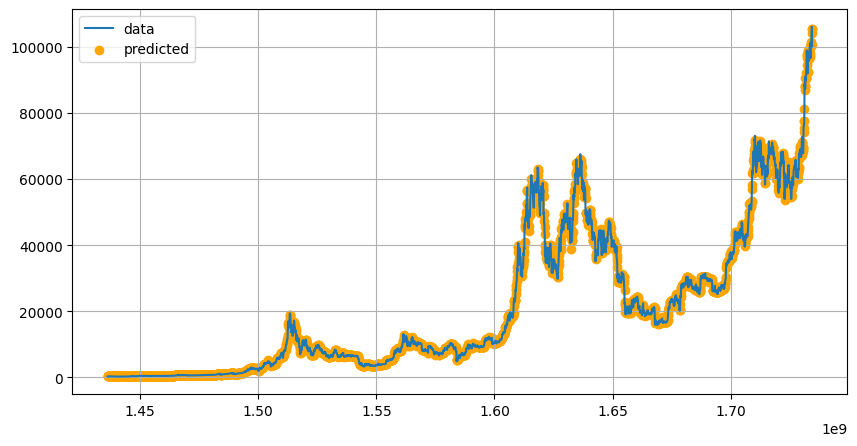

In [103]:
def gradientBoostingRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = gradientBoostingRegression(xData, yData)
print(f'score: {score:.3f}')

predicted = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

# K-NEAREST NEIGHBORS

score: 0.998


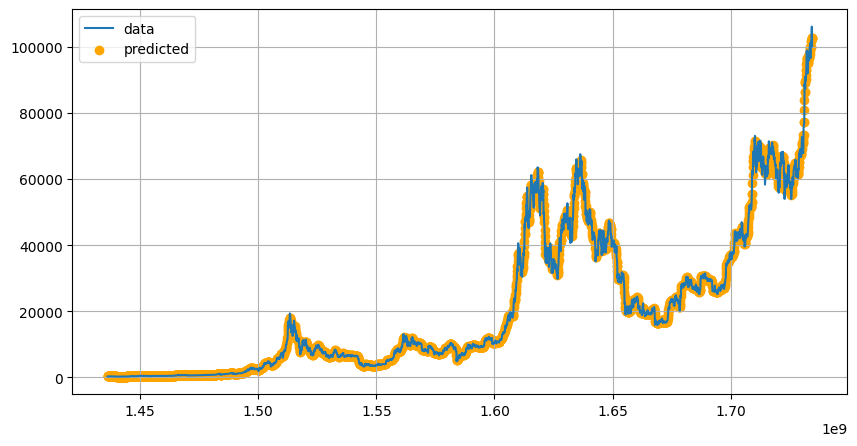

In [104]:
def knnRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = KNeighborsRegressor(n_neighbors=5)  # Ajuste n_neighbors conforme necessário
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = knnRegression(xData, yData)
print(f'score: {score:.3f}')

predicted = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

# TESTANDO DADOS NOVO

score: 0.998


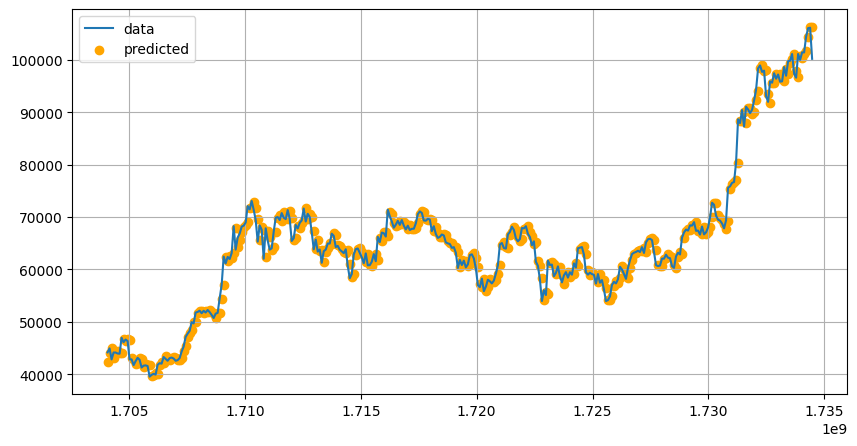

In [105]:
model, score = linearRegression(xData, yData)
print(f'score: {score:.3f}')

df = df.loc[df.date.dt.year > 2023]
xData, yData = getTrainArrays(df)
predicted = model.predict(xData)

plt.figure(figsize=(10, 5))
plt.plot(df.date_sec, yData, label='data')
plt.scatter(df.date_sec, predicted, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

In [106]:
def getNewRow(df):
    global n 
    lastRow = df.iloc[-1].copy()
    lastRow['date'] = lastRow.date + pd.Timedelta(days=1)
    lastRow['date_sec'] = lastRow.date.timestamp()

    for i in range(n-1, 1, -1): #yn9 = yn8 ... yn2 = yn1
        lastRow[f'yn{i}'] = lastRow[f'yn{i-1}']

    lastRow['yn1'] = lastRow['yn']
    newRow = pd.DataFrame([lastRow.to_dict()])

    xData, yData = getTrainArrays(newRow)
    predicted = model.predict(xData)[0]
    newRow['price'] = predicted
    newRow['yn'] = predicted  
    return newRow


for i in range(150): 
    df = pd.concat([df, getNewRow(df)], ignore_index=True)

df.tail(10)

,date,price,rate,yn,yn1,yn2,yn3,yn4,yn5,yn6,yn7,yn8,yn9,date_sec
493,2025-05-08,110311.312318,4.64,110311.312318,110238.279004,110165.259139,110092.252727,110019.259768,109946.280265,109873.314220,109800.361634,109727.422510,109654.496848,1.746662e+09
494,2025-05-09,110384.359081,4.64,110384.359081,110311.312318,110238.279004,110165.259139,110092.252727,110019.259768,109946.280265,109873.314220,109800.361634,109727.422510,1.746749e+09
495,2025-05-10,110457.419291,4.64,110457.419291,110384.359081,110311.312318,110238.279004,110165.259139,110092.252727,110019.259768,109946.280265,109873.314220,109800.361634,1.746835e+09
496,2025-05-11,110530.492945,4.64,110530.492945,110457.419291,110384.359081,110311.312318,110238.279004,110165.259139,110092.252727,110019.259768,109946.280265,109873.314220,1.746922e+09
497,2025-05-12,110603.580042,4.64,110603.580042,110530.492945,110457.419291,110384.359081,110311.312318,110238.279004,110165.259139,110092.252727,110019.259768,109946.280265,1.747008e+09
498,2025-05-13,110676.680580,4.64,110676.680580,110603.580042,110530.492945,110457.419291,110384.359081,110311.312318,110238.279004,110165.259139,110092.252727,110019.259768,1.747094e+09
499,2025-05-14,110749.794557,4.64,110749.794557,110676.680580,110603.580042,110530.492945,110457.419291,110384.359081,110311.312318,110238.279004,110165.259139,110092.252727,1.747181e+09
500,2025-05-15,110822.921971,4.64,110822.921971,110749.794557,110676.680580,110603.580042,110530.492945,110457.419291,110384.359081,110311.312318,110238.279004,110165.259139,1.747267e+09
501,2025-05-16,110896.062821,4.64,110896.062821,110822.921971,110749.794557,110676.680580,110603.580042,110530.492945,110457.419291,110384.359081,110311.312318,110238.279004,1.747354e+09
502,2025-05-17,110969.217105,4.64,110969.217105,110896.062821,110822.921971,110749.794557,110676.680580,110603.580042,110530.492945,110457.419291,110384.359081,110311.312318,1.747440e+09


In [107]:
df['pred'] = (df.date.dt.year > 2024)
fig = px.line(df, x='date', y='price', color='pred')
fig.show()